## Código

In [1]:
import math

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#
# Este código es independiente de la función de
# pérdida utilizada.
#
def mejora(w, loss, mu, delta=0.001):
    def grd_loss(w):
        #
        # Aproximación numérica del gradiente
        #
        grd = []
        L0, _ = loss(w)
        for i in range(len(w)):
            w[i] += delta
            L, _ = loss(w)
            grd.append((L - L0) / delta)
            w[i] -= delta
        return grd

    grd = grd_loss(w)
    w = [u - mu * g for u, g in zip(w, grd)]
    return w

In [3]:
def f(x):
    result = [
        math.exp(0.10 * u + 0.5) if u < 5 else math.exp(0.15 * u + 0.7) for u in x
    ]
    return np.array(result)

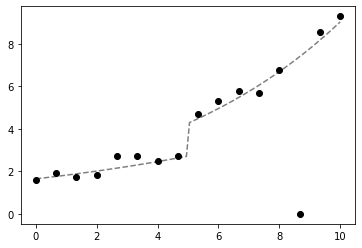

In [4]:
np.random.seed(12345)
x_real = np.linspace(start=0, stop=10, num=100)
x_data = np.linspace(start=0, stop=10, num=16)
d_real = f(x_real)
d_data = f(x_data) + np.random.normal(0, 0.3, len(x_data))

# introduce un outlier en los datos de entrenamiento
d_data[13] = 0

plt.plot(x_real, d_real, "--", color="gray")
plt.plot(x_data, d_data, "o", color="black")
plt.show()

In [5]:
# selecciona aleatoriamente 10 elementos del conjunto de datos
index = sorted(np.random.choice(len(x_data), 12, replace=False))

# muestra usada para estimar los parámetros del modelo
x_fit = x_data[index]
d_fit = d_data[index]

# muestra usada para evaluar la generalización
x_test = np.delete(x_data, index)
d_test = np.delete(d_data, index)

In [6]:
def g(w, x):
    return np.exp(w[0] + w[1] * x)

In [7]:
epsilon = 1


def huber_loss(w):
    y_fit = g(w, x_fit)
    y_test = g(w, x_test)
    e_fit = abs(d_fit - y_fit)
    e_test = abs(d_test - y_test)
    loss_fit = sum(
        [
            0.5 * np.power(e, 2)
            if e <= epsilon
            else epsilon * e - 0.5 * epsilon * epsilon
            for e in e_fit
        ]
    )
    loss_test = sum(
        [
            0.5 * np.power(e, 2)
            if e <= epsilon
            else epsilon * e - 0.5 * epsilon * epsilon
            for e in e_test
        ]
    )
    return loss_fit, loss_test

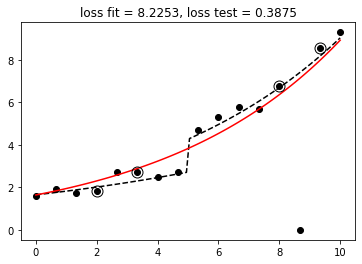

In [8]:
w = [0.9, 0.20]  # coeficientes iniciales

loss_fit, loss_test = huber_loss(w)
history_loss_fit = [loss_fit]
history_loss_test = [loss_test]

for epoch in range(5000):
    w = mejora(w, huber_loss, 0.0001)
    loss_fit, loss_test = huber_loss(w)
    history_loss_fit.append(loss_fit)
    history_loss_test.append(loss_test)

y_real = g(w, x_real)

plt.title('loss fit = {}, loss test = {}'.format(round(loss_fit,4), round(loss_test, 4)))
plt.plot(x_data, d_data, "o", color="black")
plt.plot(x_real, d_real, "--", color="black")
plt.plot(x_real, y_real, color="red")
plt.plot(x_test, d_test, "o", color="black", fillstyle="none", markersize=11)
plt.show()

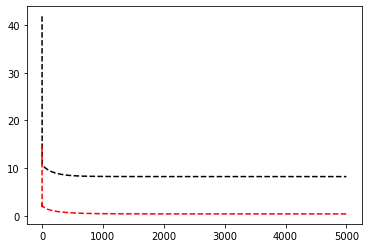

In [9]:
plt.plot(history_loss_fit, "--k")
plt.plot(history_loss_test, "--r")
plt.show()

## Epsilon- insensitive

In [10]:
epsilon = 1


def epsilon_insensitive_loss(w):
    y_fit = g(w, x_fit)
    y_test = g(w, x_test)
    e_fit = abs(d_fit - y_fit)
    e_test = abs(d_test - y_test)

    #(e*e) - 2*e +  epsilon * epsilon
    loss_fit = sum(
        [
            0
            if e <= epsilon            
            else  epsilon*e - epsilon
            for e in e_fit
        ]
    )
    loss_test = sum(
        [
            0
            if e <= epsilon
            else epsilon*e - epsilon
            for e in e_test
        ]
    )
    return loss_fit, loss_test

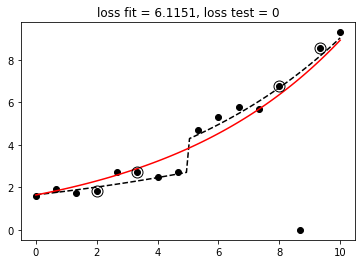

In [11]:
w = [0.9, 0.20]  # coeficientes iniciales

loss_fit, loss_test = epsilon_insensitive_loss(w)
history_loss_fit = [loss_fit]
history_loss_test = [loss_test]

for epoch in range(5000):
    w = mejora(w, huber_loss, 0.0001)
    loss_fit, loss_test = epsilon_insensitive_loss(w)
    history_loss_fit.append(loss_fit)
    history_loss_test.append(loss_test)

y_real = g(w, x_real)



plt.title('loss fit = {}, loss test = {}'.format(round(loss_fit,4), round(loss_test, 4)))
plt.plot(x_data, d_data, "o", color="black")
plt.plot(x_real, d_real, "--", color="black")
plt.plot(x_real, y_real, color="red")
plt.plot(x_test, d_test, "o", color="black", fillstyle="none", markersize=11)
plt.show()

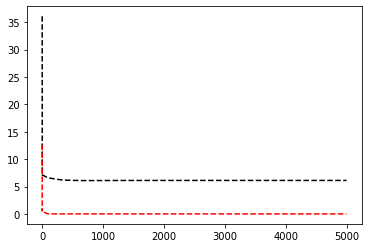

In [12]:
plt.plot(history_loss_fit, "--k")
plt.plot(history_loss_test, "--r")
plt.show()

## Epsilon cuadrada insensitiva

In [15]:
epsilon = 1


def epsilon_cuadrada_insensitive_loss(w):
    y_fit = g(w, x_fit)
    y_test = g(w, x_test)
    e_fit = abs(d_fit - y_fit)
    e_test = abs(d_test - y_test)

    #(e*e) - 2*e +  epsilon * epsilon
    loss_fit = sum(
        [
            0
            if e <= epsilon            
            else  (epsilon*e - epsilon)**2
            for e in e_fit
        ]
    )
    loss_test = sum(
        [
            0
            if e <= epsilon
            else (epsilon*e - epsilon)**2
            for e in e_test
        ]
    )
    return loss_fit, loss_test

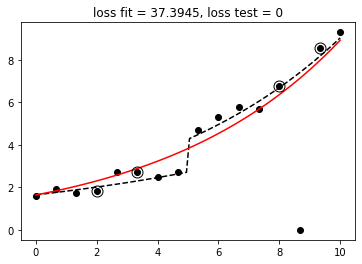

In [16]:
w = [0.9, 0.20]  # coeficientes iniciales

loss_fit, loss_test = epsilon_cuadrada_insensitive_loss(w)
history_loss_fit = [loss_fit]
history_loss_test = [loss_test]

for epoch in range(5000):
    w = mejora(w, huber_loss, 0.0001)
    loss_fit, loss_test = epsilon_cuadrada_insensitive_loss(w)
    history_loss_fit.append(loss_fit)
    history_loss_test.append(loss_test)

y_real = g(w, x_real)



plt.title('loss fit = {}, loss test = {}'.format(round(loss_fit,4), round(loss_test, 4)))
plt.plot(x_data, d_data, "o", color="black")
plt.plot(x_real, d_real, "--", color="black")
plt.plot(x_real, y_real, color="red")
plt.plot(x_test, d_test, "o", color="black", fillstyle="none", markersize=11)
plt.show()

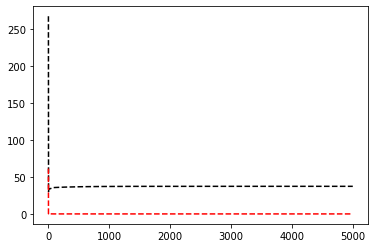

In [17]:
plt.plot(history_loss_fit, "--k")
plt.plot(history_loss_test, "--r")
plt.show()